<a href="https://colab.research.google.com/github/creamer-dreamer/this-model-doesnt-work-/blob/main/Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Eimear's Machine Learning Project**




# **Load Data**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/HR030.20241015T191038.csv')
df

,STATISTIC,Statistic Label,TLIST(A1),Year,C02873V03456,Type of Admission,C03332V04019,Community Healthcare Organisations,C02945V03560,ICD 10 Diagnostic Group,UNIT,VALUE
0,HR029C01,Hospital Admissions,2022,2022,-,All admissions,-,All CHOs incl. non-residents,2,Organic mental disorders,Number,318.0
1,HR029C01,Hospital Admissions,2022,2022,-,All admissions,-,All CHOs incl. non-residents,11,Alcoholic disorders,Number,806.0
2,HR029C01,Hospital Admissions,2022,2022,-,All admissions,-,All CHOs incl. non-residents,13,Other drug disorders,Number,813.0
3,HR029C01,Hospital Admissions,2022,2022,-,All admissions,-,All CHOs incl. non-residents,4,"Schizophrenia, schizotypal and delusional diso...",Number,3486.0
4,HR029C01,Hospital Admissions,2022,2022,-,All admissions,-,All CHOs incl. non-residents,6,Depressive disorders,Number,3647.0
...,...,...,...,...,...,...,...,...,...,...,...,...
611,HR029C02,Hospital Admissions (Rate),2022,2022,01,First admissions,10,Non-resident,16,Intellectual disability,"Rate per 100,000 Pop.",NaN
612,HR029C02,Hospital Admissions (Rate),2022,2022,01,First admissions,10,Non-resident,17,Development disorders,"Rate per 100,000 Pop.",NaN
613,HR029C02,Hospital Admissions (Rate),2022,2022,01,First admissions,10,Non-resident,18,"Behavioural, emotional disorders of childhood ...","Rate per 100,000 Pop.",NaN
614,HR029C02,Hospital Admissions (Rate),2022,2022,01,First admissions,10,Non-resident,19,Other and unspecified,"Rate per 100,000 Pop.",NaN


# **Data Preperation**

## **Data Separation as X and Y**

In [ ]:
y = df['VALUE']
y
x = df.drop(columns=['VALUE','STATISTIC','Statistic Label', 'TLIST(A1)', 'Year','C02873V03456','C03332V04019','UNIT'])
x

,Type of Admission,Community Healthcare Organisations,C02945V03560,ICD 10 Diagnostic Group
0,All admissions,All CHOs incl. non-residents,2,Organic mental disorders
1,All admissions,All CHOs incl. non-residents,11,Alcoholic disorders
2,All admissions,All CHOs incl. non-residents,13,Other drug disorders
3,All admissions,All CHOs incl. non-residents,4,"Schizophrenia, schizotypal and delusional diso..."
4,All admissions,All CHOs incl. non-residents,6,Depressive disorders
...,...,...,...,...
611,First admissions,Non-resident,16,Intellectual disability
612,First admissions,Non-resident,17,Development disorders
613,First admissions,Non-resident,18,"Behavioural, emotional disorders of childhood ..."
614,First admissions,Non-resident,19,Other and unspecified


## **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
y_train= y_train.fillna(y_train.mean())
y_test= y_test.fillna(y_test.mean())

# **Model Building**

## **Linear Regression**

### **Training the Model**

In [ ]:
# @title
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

### **Applying the Model to Make a Prediction**

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)
y_lr_train_pred

array([  55.43231853,  336.03671517, -108.15755334,  252.00944243,
        211.51980709,  274.04609057,   87.06017582,  109.50869189,
        249.63359465,  258.04070664,  -18.90544433,  391.76874253,
        185.11678607,  -48.95464444,  259.63667172,  286.66158578,
       -148.58991187,   20.41216042,  354.66899592,  260.10298722,
          3.44477101,  340.9532256 ,   97.0632529 ,  195.19161863,
        207.46700141,  455.57983601,  181.62618452,  145.47637681,
        253.12419621,   71.45218114,  212.38351184,  117.10937594,
        578.11545632,    9.46155654,  374.95693067,  111.47267174,
        274.04609057,  327.64408186,  419.65211999,   20.01477117,
        -92.54955866,  156.42698069,  177.51610202,  321.13160634,
        442.10063605,  207.46700141,  260.10298722,  122.42327562,
        173.46329634,   88.41957055,  415.69761504,  370.04042024,
        327.01012225,  240.0423855 ,  149.99832723,  -74.15384828,
        136.9309952 ,   54.41586548,  -10.42898896,  -98.56634

In [ ]:
y_lr_test_pred

array([ 122.98789184,  387.57242588,  240.0423855 ,  211.51980709,
        -70.99129259,  -80.58250173,  -13.9889339 ,  182.58819   ,
        167.03464288,  258.04070664,  104.02756524,  294.10669229,
        189.07129103,   99.02723275, -127.65353883,  155.06758596,
        272.08211072,  192.09557709,  161.18791357,  -76.8380219 ,
        219.12049114,  578.11545632,  454.61783053,  340.9532256 ,
        156.99159691,  415.69761504,  291.08240623,  381.53833243,
        250.59560013,  295.60435665,  340.08952085,  233.07807316,
        132.01448477,  122.02588637,  301.0854833 ,  173.46329634,
        476.10434112,   88.98418678,  161.18791357,   89.4360236 ,
        217.55390054,  -47.59524972,  268.02930504,  224.03700157,
        156.02959144,   95.86467706, -138.99870272,  184.65047058,
        136.9309952 ,  165.07066303, -132.57004926,   59.17679837,
         88.98418678,  204.93840533,  295.60435665,  252.65788071,
         88.0221813 ,  -47.59524972,  184.0020323 , -250.60102

### **Evaluate Model Performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse=mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2=r2_score(y_test, y_lr_test_pred)

In [ ]:
print('lr mse(train):',lr_train_mse)
print('lr r2(train):',lr_train_r2)
print('lr mse(test):',lr_test_mse)
print('lr r2(test):',lr_test_r2)

lr mse(train): 640374.964638706
lr r2(train): 0.0425253806814333
lr mse(test): 125279.47983613703
lr r2(test): -0.05125008078238613


In [ ]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]). transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,640374.964639,0.042525,125279.479836,-0.05125


## **Random Forest**

### **Training the Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the Model to Make a Prediction**

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)
y_rf_train_pred

array([  77.74637387,   73.24636886,   72.29499371,  459.15078868,
        586.46743666,   72.73675232,   71.78537717,  577.10744179,
         72.73675232,   71.78537717,   71.78537717,   73.24636886,
         71.78537717,   71.78537717,   72.73675232,   72.73675232,
         77.74637387,   73.24636886,   72.73675232,   71.78537717,
         72.29499371,   73.24636886,   71.78537717,   72.29499371,
        439.79490122,   72.73675232,   72.73675232,   71.78537717,
         71.78537717,   72.29499371,  439.79490122,   71.78537717,
        817.73126626,   71.78537717,  440.74627638,   71.78537717,
         72.73675232,   72.73675232,   72.73675232,   71.78537717,
         71.78537717,   73.24636886,  586.46743666,  404.66629659,
        685.22073692,  439.79490122,   71.78537717,   73.24636886,
         72.29499371,   73.24636886,   72.73675232,  440.74627638,
         71.78537717,   72.73675232,   78.69774902,   72.29499371,
         73.24636886,   73.24636886,   73.24636886,   72.29499

### **Evaluate Model Performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse=mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse=mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2=r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]). transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,418015.332839,0.374993,80183.985036,0.327157


# **Model Comparison**

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,640374.964639,0.042525,125279.479836,-0.05125
0,Random Forest,418015.332839,0.374993,80183.985036,0.327157


In [ ]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,640374.964639,0.042525,125279.479836,-0.05125
1,Random Forest,418015.332839,0.374993,80183.985036,0.327157


# **Data Visualisation of Prediction Results**

Text(0.5, 0, 'Actual Values')

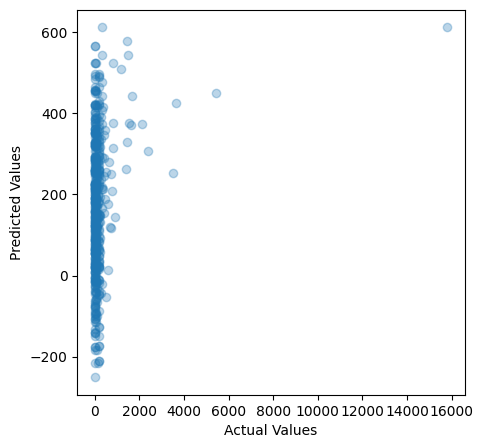

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
x=np.polyfit(y_train, y_lr_train_pred,1)
p=np.poly1d(x)
plt.scatter(x=y_train, y = y_lr_train_pred ,alpha = 0.3)
plt.plot()
plt.ylabel ('Predicted Values')
plt.xlabel ('Actual Values')
